# Projeto AceleraDev Data Science - Pt.2

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

#ver os estilos disponíveis, para escolher o seaborn-colorblind que é bonitinho 
plt.style.available

['Solarize_Light2',
 '_classic_test',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
empresas = pd.read_csv("dados_trabalhados/empresas_limpa1.csv")
empresas.drop('Unnamed: 0', axis=1,inplace=True)

In [4]:
#Ver quais e quantos valores missing eu tenho
aux = pd.DataFrame({'tipos':empresas.dtypes,
                    'desvio':empresas.std(),
                    'missing':((empresas.isna().sum()/empresas.shape[0])*100)})

aux.sort_values(by='missing', ascending=False).head(10)

,tipos,desvio,missing
qt_socios_feminino,float64,0.840194,68.628677
qt_socios_masculino,float64,2.848980,57.794539
qt_socios_st_regular,float64,2.578793,33.510203
idade_media_socios,float64,12.626447,32.793133
idade_minima_socios,float64,12.514921,32.793133
idade_maxima_socios,float64,13.930385,32.793133
empsetorcensitariofaixarendapopulacao,float64,1161.889222,31.111750
qt_socios,float64,3.276626,24.895414
qt_socios_pj,float64,0.195166,24.895414
qt_socios_pf,float64,3.258079,24.895414


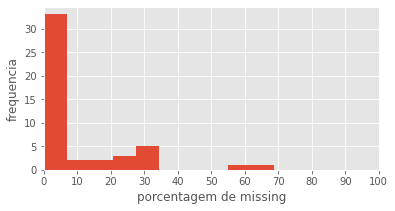

In [5]:
plt.figure(figsize = (6,3))
plt.hist(aux['missing'], bins=10)
plt.xlim(0,100)
plt.xticks(range(0,101,10))
plt.xlabel('porcentagem de missing')
plt.ylabel('frequencia');

In [6]:
print("são {} empresas cadastradas".format(empresas.shape[0]), end='\n\n')
print("são {} variáveis a serem avaliadas".format(empresas.shape[1]),end='\n\n')
print('colunas:',list(empresas.columns))

são 462298 empresas cadastradas

são 47 variáveis a serem avaliadas

colunas: ['id', 'fl_matriz', 'de_natureza_juridica', 'sg_uf', 'natureza_juridica_macro', 'de_ramo', 'setor', 'idade_empresa_anos', 'idade_emp_cat', 'fl_me', 'fl_sa', 'fl_epp', 'fl_mei', 'fl_ltda', 'fl_st_especial', 'fl_rm', 'nm_divisao', 'nm_segmento', 'fl_spa', 'fl_antt', 'fl_veiculo', 'fl_optante_simples', 'vl_total_veiculos_pesados_grupo', 'vl_total_veiculos_leves_grupo', 'fl_optante_simei', 'sg_uf_matriz', 'de_saude_tributaria', 'de_nivel_atividade', 'fl_simples_irregular', 'empsetorcensitariofaixarendapopulacao', 'nm_meso_regiao', 'nm_micro_regiao', 'fl_passivel_iss', 'qt_socios', 'qt_socios_pf', 'qt_socios_pj', 'idade_media_socios', 'idade_maxima_socios', 'idade_minima_socios', 'qt_socios_st_regular', 'qt_socios_masculino', 'qt_socios_feminino', 'de_faixa_faturamento_estimado', 'de_faixa_faturamento_estimado_grupo', 'vl_faturamento_estimado_aux', 'vl_faturamento_estimado_grupo_aux', 'qt_filiais']


### 1. Tipos das empresas:
'fl_matriz', 'fl_me', 'fl_sa', 'fl_epp', 'fl_mei', 'fl_ltda', 'fl_st_especial', 'fl_optante_simples', 
'fl_optante_simei', 'qt_filiais'


Ltda, ME, Epp, MEI, SA

* `fl_sa` e `fl_ltda` se diferenciam pelo divisao de responsabilidade/capital dos socios
* A coluna `fl_epp` está interamente False
* Todo `fl_mei` corresponderia a `fl_optante_simei`
* `fl_me`,  tem 100x mais valores `False` que `True`
* `fl_st_especial` tem apenas 68 falsos (true means that some extraordinary situation is identified by the IRS)

In [7]:
tipos = empresas[['fl_matriz', 'fl_me', 'fl_sa', 'fl_epp', 'fl_mei', 'fl_ltda', 'fl_st_especial', 
                  'fl_optante_simples', 'fl_optante_simei', 'qt_filiais']]

In [8]:
# tem optante simei que é mei e tem optante que não??
teste = tipos[tipos['fl_optante_simei'] == True]
teste.fl_mei.value_counts()

True     92369
False     1671
Name: fl_mei, dtype: int64

In [9]:
#tem mei que é simples e tem mei que não
teste = tipos[tipos['fl_mei'] == True]
teste.fl_optante_simples.value_counts()

True     94688
False     2045
Name: fl_optante_simples, dtype: int64

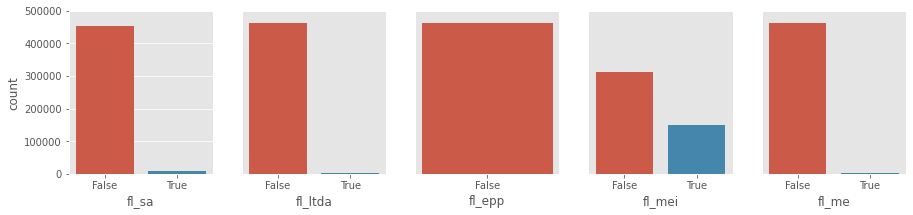

In [10]:
plt.figure(figsize=(15,3))

plt.subplot(1,5,1)
sns.countplot(empresas.fl_sa)
plt.ylim(0,500000)

plt.subplot(1,5,2)
sns.countplot(empresas.fl_ltda)
plt.ylim(0,500000)
plt.yticks([])
plt.ylabel("")

plt.subplot(1,5,3)
sns.countplot(empresas.fl_epp)
plt.ylim(0,500000)
plt.yticks([])
plt.ylabel("")

plt.subplot(1,5,4)
sns.countplot(empresas.fl_mei)
plt.ylim(0,500000)
plt.yticks([])
plt.ylabel("")

plt.subplot(1,5,5)
sns.countplot(empresas.fl_me)
plt.ylim(0,500000)
plt.yticks([])
plt.ylabel("")

plt.show()

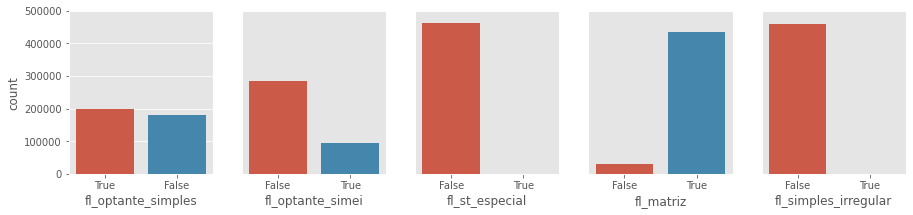

In [11]:
plt.figure(figsize=(15,3))

plt.subplot(1,5,1)
sns.countplot(empresas.fl_optante_simples)
plt.ylim(0,500000)

plt.subplot(1,5,2)
sns.countplot(empresas.fl_optante_simei)
plt.ylim(0,500000)
plt.yticks([])
plt.ylabel("")

plt.subplot(1,5,3)
sns.countplot(empresas.fl_st_especial)
plt.ylim(0,500000)
plt.yticks([])
plt.ylabel("")

plt.subplot(1,5,4)
sns.countplot(empresas.fl_matriz)
plt.ylim(0,500000)
plt.yticks([])
plt.ylabel("")

plt.subplot(1,5,5)
sns.countplot(empresas.fl_simples_irregular)
plt.ylim(0,500000)
plt.yticks([])
plt.ylabel("");

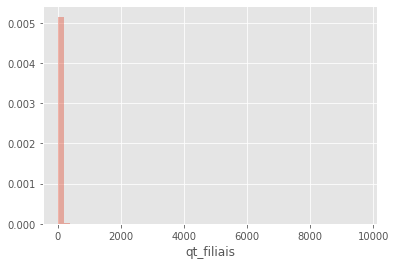

In [12]:
sns.distplot(empresas.qt_filiais)

In [13]:
empresas.qt_filiais.value_counts().head()

0    418043
1     19561
2      5943
3      2884
4      1772
Name: qt_filiais, dtype: int64

### 2. Veículos

- `fl_spa`: true if the company has it's own fuel station
- `fl_antt`:true if the company is certified by ANTT for trasnportation purposes
- `fl_veiculo`: true if the company owns at least one vehicle
- `vl_total_veiculos_pesados_grupo`: numeric, economic value of the heavy weight vehicles of the economic group of the company
- `vl_total_veiculos_leves_grupo`: numeric, economic value of the light weight vehicles of the economic group of the company

Observações: 
* `fl_veiculo` é redundante e será removida com os números totais de veículos;

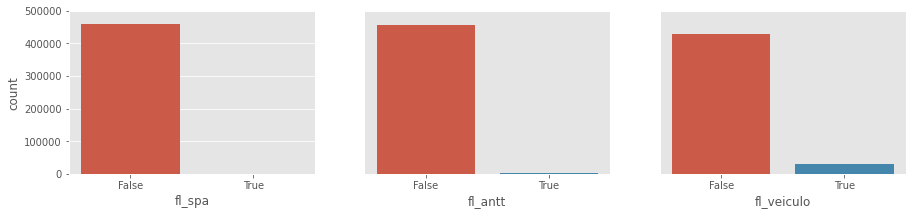

In [14]:
plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
sns.countplot(empresas.fl_spa)
plt.ylim(0,500000)

plt.subplot(1,3,2)
sns.countplot(empresas.fl_antt)
plt.ylim(0,500000)
plt.yticks([])
plt.ylabel("")

plt.subplot(1,3,3)
sns.countplot(empresas.fl_veiculo)
plt.ylim(0,500000)
plt.yticks([])
plt.ylabel("");

In [15]:
empresas.vl_total_veiculos_leves_grupo.value_counts().head()

0.0    424180
1.0     15738
2.0      5232
3.0      2610
4.0      1569
Name: vl_total_veiculos_leves_grupo, dtype: int64

In [16]:
empresas.vl_total_veiculos_pesados_grupo.value_counts().head()

0.0    441360
1.0      6785
2.0      2585
3.0      1301
4.0       827
Name: vl_total_veiculos_pesados_grupo, dtype: int64

### 3. Atividade da empresa:

* `de_natureza_juridica`  e `natureza_juridica_macro` tem muitas categorias;
* `de_ramo`, `setor`, `nm_divisao` e `nm_segmento` tem muitas categorias dizendo sobre quase a mesma coisa!

* `fl_passivel_iss`: true if the company performs any activity that is taxable under ISS - Tax under services
* `de_saude_tributaria`: Green if all tax are OK, Red if none are OK, mas tem mto mais cor! será removida.

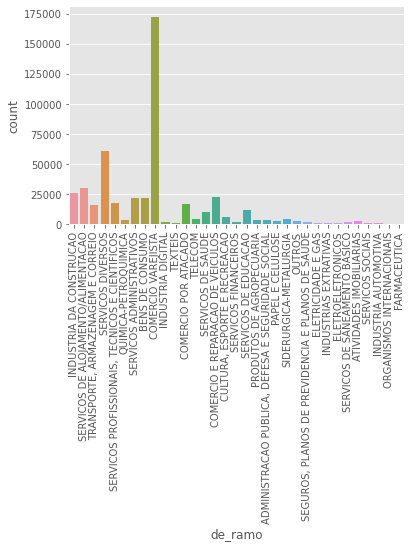

In [17]:
sns.countplot(empresas.de_ramo)
plt.xticks(rotation=90);

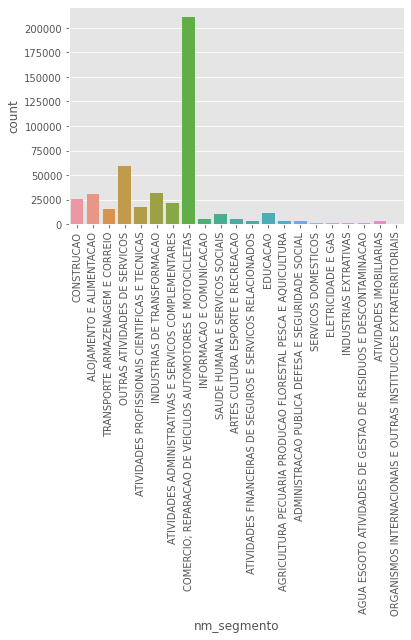

In [18]:
sns.countplot(empresas.nm_segmento)
plt.xticks(rotation=90);

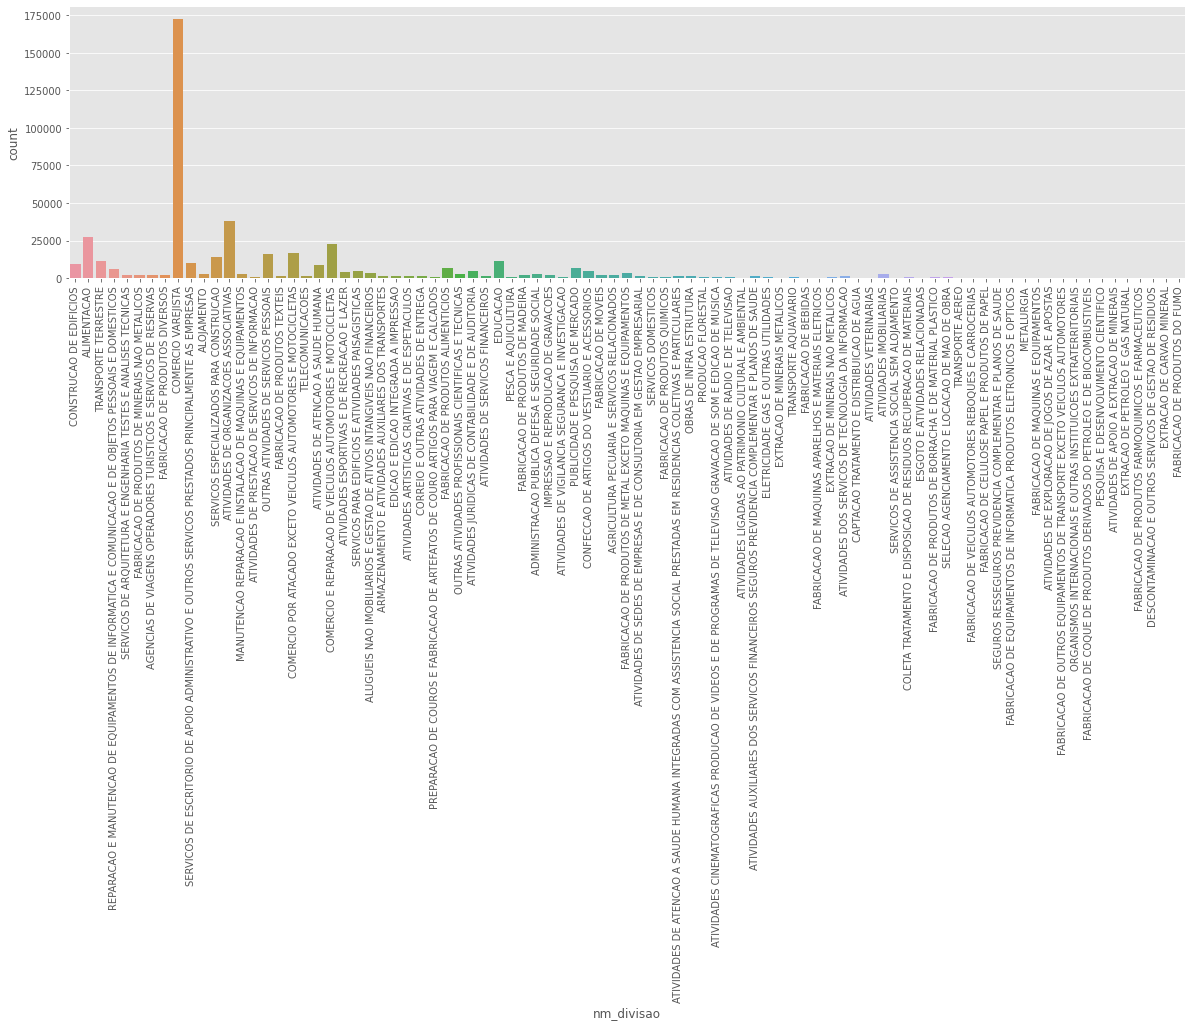

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(empresas.nm_divisao)
plt.xticks(rotation=90);

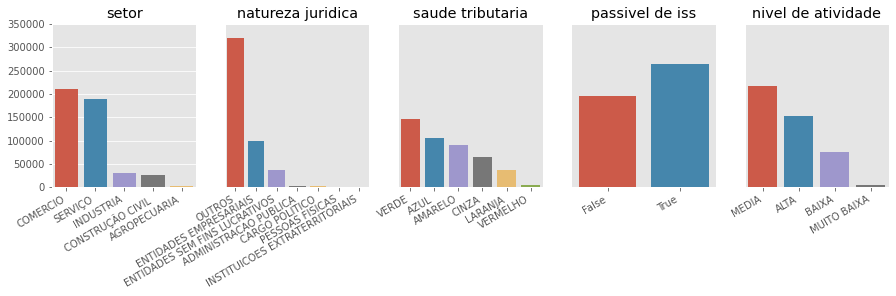

In [20]:
plt.figure(figsize=(15,3))

plt.subplot(1,5,1)
sns.countplot(empresas.setor, order=empresas.setor.value_counts().index)
plt.title('setor')
plt.ylim(0,350000)
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=30, ha='right')

plt.subplot(1,5,2)
sns.countplot(empresas.natureza_juridica_macro, order=empresas.natureza_juridica_macro.value_counts().index)
plt.title('natureza juridica')
plt.ylim(0,350000)
plt.xlabel("")
plt.ylabel("")
plt.yticks([])
plt.xticks(rotation=30, ha='right')

plt.subplot(1,5,3)
sns.countplot(empresas.de_saude_tributaria, order=empresas.de_saude_tributaria.value_counts().index)
plt.title('saude tributaria')
plt.ylim(0,350000)
plt.xlabel("")
plt.ylabel("")
plt.yticks([])
plt.xticks(rotation=30, ha='right')

plt.subplot(1,5,4)
sns.countplot(empresas.fl_passivel_iss)
plt.title('passivel de iss')
plt.ylim(0,350000)
plt.xlabel("")
plt.ylabel("")
plt.yticks([])
plt.xticks(rotation=30, ha='right')

plt.subplot(1,5,5)
sns.countplot(empresas.de_nivel_atividade, order=empresas.de_nivel_atividade.value_counts().index)
plt.title('nivel de atividade')
plt.ylim(0,350000)
plt.xlabel("")
plt.ylabel("")
plt.yticks([])
plt.xticks(rotation=30, ha='right');

In [21]:
empresas.query('setor == "SERVIÇO"')['fl_passivel_iss'].value_counts()

True     189260
False       384
Name: fl_passivel_iss, dtype: int64

In [22]:
empresas.query('fl_passivel_iss == True')['setor'].value_counts()

SERVIÇO             189260
COMERCIO             40823
CONSTRUÇÃO CIVIL     25300
INDUSTRIA             8408
AGROPECUARIA           950
Name: setor, dtype: int64

### 4. Localização

* `sg_uf` localização da empresa
* `sg_uf_matriz` localização da matriz
* `nm_meso_regiao`, `nm_micro_regiao` localizacao da empresa
* `fl_rm` descreve se está na região metropolitana e
* `nm_meso_regiao` que descreve a localização da empresa

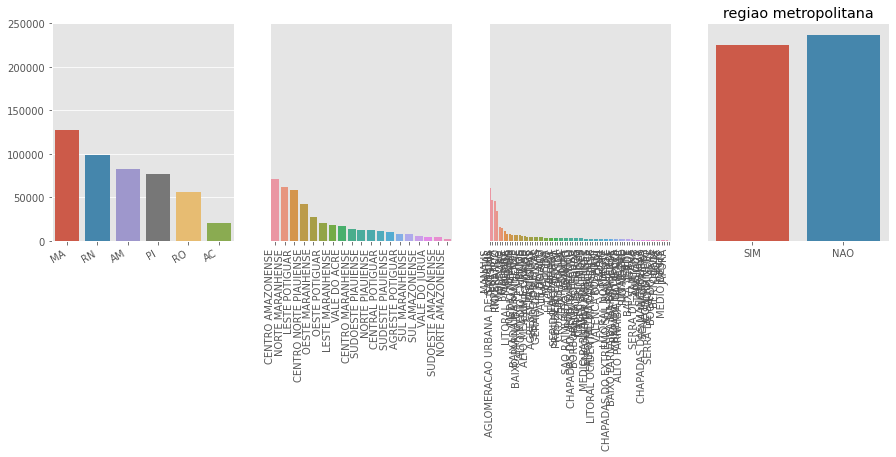

In [23]:
plt.figure(figsize=(15,4))

plt.subplot(1,4,1)
sns.countplot(empresas.sg_uf, order=empresas.sg_uf.value_counts().index)
plt.ylim(0,250000)
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=30, ha='right')

plt.subplot(1,4,2)
sns.countplot(empresas.nm_meso_regiao, order=empresas.nm_meso_regiao.value_counts().index)
plt.ylim(0,250000)
plt.yticks([])
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=90, ha='right')

plt.subplot(1,4,3)
sns.countplot(empresas.nm_micro_regiao, order=empresas.nm_micro_regiao.value_counts().index)
plt.ylim(0,250000)
plt.yticks([])
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=90, ha='right')

plt.subplot(1,4,4)
sns.countplot(empresas.fl_rm)
plt.ylim(0,250000)
plt.yticks([])
plt.title('regiao metropolitana')
plt.xlabel("")
plt.ylabel("");

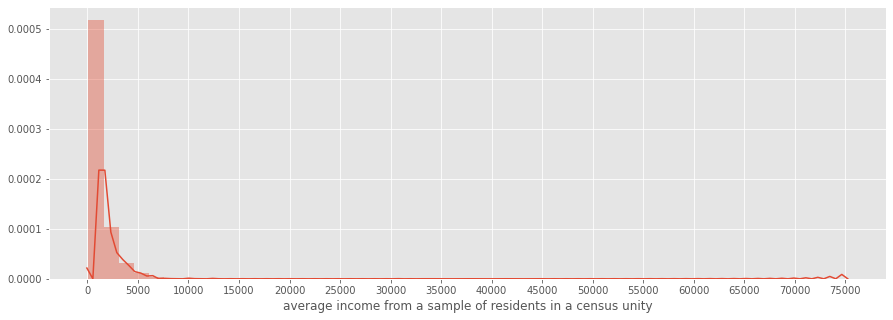

In [24]:
plt.figure(figsize=(15,5))
sns.distplot(empresas.empsetorcensitariofaixarendapopulacao)
plt.xlabel("average income from a sample of residents in a census unity")
plt.xticks(range(0,80000,5000));

### 5. Sócios

* manter `qt_socios` e remover `qt_socios_pf`, `qt_socios_pj`, `qt_socios_feminino`, `qt_socios_masculino``qt_socios_st_regular` pois são autocorrelacionadas
* manter `idade_media_socios` e remover `idade_maxima_socios`, `idade_minima_socios`, 

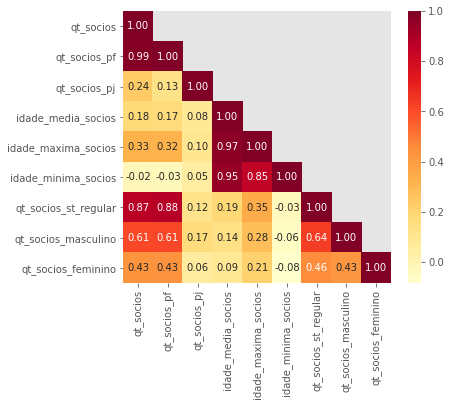

In [25]:
socios = empresas[['qt_socios', 'qt_socios_pf', 'qt_socios_pj', 'idade_media_socios', 'idade_maxima_socios',
                   'idade_minima_socios', 'qt_socios_st_regular', 'qt_socios_masculino', 'qt_socios_feminino']]

plt.figure(figsize=(6,5))
mask = np.zeros_like(socios.corr())
mask[np.triu_indices_from(mask, 1)] = True
sns.heatmap(socios.corr(method='spearman'), mask=mask, annot=True, fmt='.2f',cmap='YlOrRd');

In [26]:
(socios.isna().sum()/socios.shape[0]).sort_values(ascending=False)

qt_socios_feminino      0.686287
qt_socios_masculino     0.577945
qt_socios_st_regular    0.335102
idade_minima_socios     0.327931
idade_maxima_socios     0.327931
idade_media_socios      0.327931
qt_socios_pj            0.248954
qt_socios_pf            0.248954
qt_socios               0.248954
dtype: float64

### 6. Faturamento

* Todas se referem ao faturamento ou da matriz ou da matriz+filial, manter `vl_faturamento_estimado_grupo_aux`

In [27]:
faturamento = empresas[['de_faixa_faturamento_estimado', 'de_faixa_faturamento_estimado_grupo', 
                        'vl_faturamento_estimado_aux', 'vl_faturamento_estimado_grupo_aux']]

faturamento.corr(method='spearman') #spearman pois claramente não é normal

,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux
vl_faturamento_estimado_aux,1.000000,0.924589
vl_faturamento_estimado_grupo_aux,0.924589,1.000000


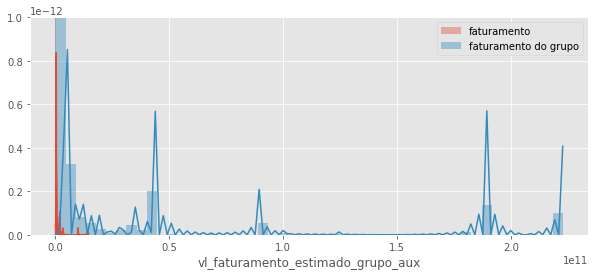

In [28]:
plt.figure(figsize=(10,4))
sns.distplot(faturamento['vl_faturamento_estimado_aux'])
sns.distplot(faturamento['vl_faturamento_estimado_grupo_aux'])
plt.legend(['faturamento','faturamento do grupo']);